In [1]:
import pandas as pd
import math

In [24]:
data = pd.read_csv("ml-100k/u.data",sep="\t",header=None)
data

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [20]:
len(data)

100000

# Test in user 3

In [25]:
user_3= data[(data[0]==4)]
print(user_3)

movie_3 = user_3[1].tolist()
print(movie_3)

       0    1  2          3
1250   4  264  3  892004275
1329   4  303  5  892002352
2204   4  361  5  892002353
2526   4  357  4  892003525
3277   4  260  4  892004275
5960   4  356  3  892003459
12151  4  294  5  892004409
13893  4  288  4  892001445
16305  4   50  5  892003526
18930  4  354  5  892002353
20082  4  271  4  892001690
20383  4  300  5  892001445
24519  4  328  3  892001537
24743  4  258  5  892001374
24866  4  210  3  892003374
35313  4  329  5  892002352
48826  4   11  4  892004520
51203  4  327  5  892002352
64091  4  324  5  892002353
68273  4  359  5  892002352
71055  4  362  5  892002352
76722  4  358  2  892004275
86815  4  360  5  892002352
88891  4  301  5  892002353
[264, 303, 361, 357, 260, 356, 294, 288, 50, 354, 271, 300, 328, 258, 210, 329, 11, 327, 324, 359, 362, 358, 360, 301]


In [8]:
len(user_3[1].tolist())

24

# Select rating > 3

In [9]:
# Our dataprocessing as follows
# Only select rating > 3 as a possivtive one

[Text(0.5, 0, 'Rating score')]

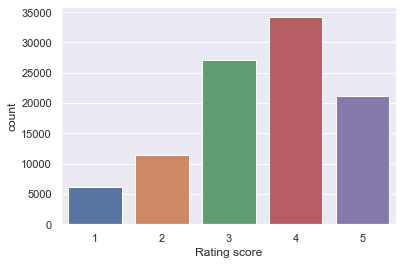

In [10]:
import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x = data[2])
ax.set(xlabel='Rating score')

In [11]:
data[0]

0        196
1        186
2         22
3        244
4        166
        ... 
99995    880
99996    716
99997    276
99998     13
99999     12
Name: 0, Length: 100000, dtype: int64

In [12]:
max(data[0])

943

In [13]:
max(data[1])

1682

In [14]:
data[data[0]==1]

,0,1,2,3
202,1,61,4,878542420
305,1,189,3,888732928
333,1,33,4,878542699
334,1,160,4,875072547
478,1,20,4,887431883
...,...,...,...,...
92049,1,28,4,875072173
92487,1,172,5,874965478
94019,1,122,3,875241498
96699,1,152,5,878542589


,userId,itemId,rating,timestamp
0,0,0,3,881250949
1,1,1,3,891717742
2,2,2,1,878887116
3,3,3,2,880606923
4,4,4,1,886397596
...,...,...,...,...
99995,875,173,3,880175444
99996,708,247,5,879795543
99997,37,1004,1,874795795
99998,58,443,2,882399156


In [ ]:

import random

def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

def insert_user(movie_id, count):
    user_item = []
    movie_id.insert(0, count)
    user_item.append(movie_id)
    return user_item

import csv
def create_data(threshold, split_percentage):
    '''Create a data set from the u.data file.
    Only select rating > threshold as a possivtive one
    Split the data into two sets: training and test'''
    total_train = []
    total_test = []
    count = 0
    for user in range(1,max(data[0])+1): # max(data[0])+1
        movie_id = data[(data[0]== user) & (data[2]> threshold)][1].tolist()
        train, test = split_data(movie_id, split_percentage)
        
        if len(test)>1:
            insert_user(train,count)
            insert_user(test,count)
            total_train.append(train)
            total_test.append(test)
            count +=1
   
    with open("data/train.txt", "w", newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=' ')
        writer.writerows(total_train) 
    with open("data/test.txt", "w", newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=' ')
        writer.writerows(total_test)
create_data(4, 0.8)


In [ ]:
import numpy as np
ml1m_rating  = pd.read_csv('ml-100k/u.data', sep="\t", header=None, names=['uid', 'mid', 'rating', 'timestamp'],  engine='python')

# Reindex
user_id = ml1m_rating[['uid']].drop_duplicates().reindex()
user_id['userId'] = np.arange(len(user_id))
ml1m_rating = pd.merge(ml1m_rating, user_id, on=['uid'], how='left')
item_id = ml1m_rating[['mid']].drop_duplicates()
item_id['itemId'] = np.arange(len(item_id))
ml1m_rating = pd.merge(ml1m_rating, item_id, on=['mid'], how='left')
df = ml1m_rating[['userId', 'itemId', 'rating', 'timestamp']]
df